## Preprocessing

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


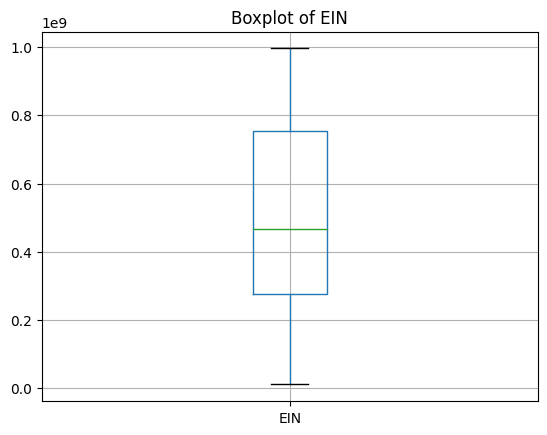

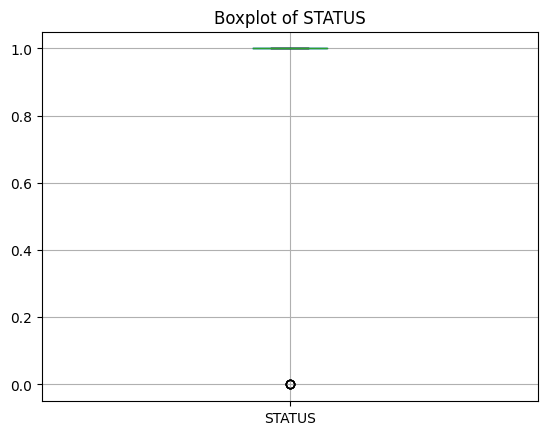

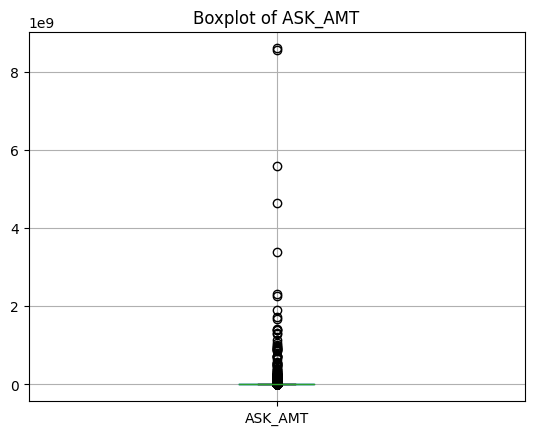

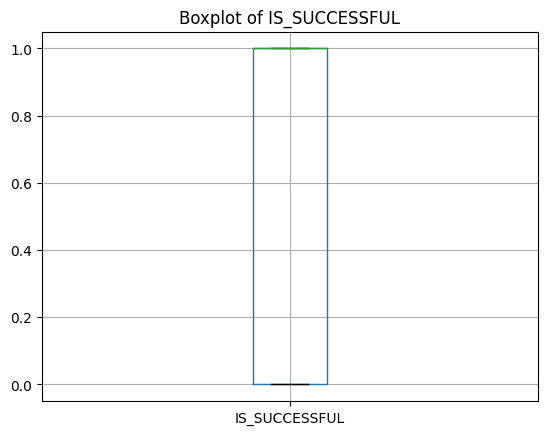

In [4]:
# Load the dataset
url = "https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv"
application_df = pd.read_csv(url)

# Display the first few rows of the dataset
application_df.head()

# Explore numerical features for potential outliers
numerical_features = application_df.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    # Visualize outliers using box plots
    application_df.boxplot(column=feature)
    plt.title(f"Boxplot of {feature}")
    plt.show()



In [5]:
# dropping outliers in 'ASK_AMT' column
q1 = application_df['ASK_AMT'].quantile(0.25)
q3 = application_df['ASK_AMT'].quantile(0.75)
iqr = q3 - q1
outlier_threshold = 1.5 * iqr
application_df = application_df[~((application_df['ASK_AMT'] < q1 - outlier_threshold) | (application_df['ASK_AMT'] > q3 + outlier_threshold))]

# keep  just 'APPLICATION_TYPE', 'CLASSIFICATION', and 'USE_CASE'
columns_to_keep = ['APPLICATION_TYPE', 'CLASSIFICATION', 'USE_CASE', 'IS_SUCCESSFUL']
application_df = application_df[columns_to_keep]

# Convert categorical data to numeric with pd.get_dummies
application_df_encoded = pd.get_dummies(application_df, dtype=float)

# Split the data
X = application_df_encoded.drop('IS_SUCCESSFUL', axis=1)
y = application_df_encoded['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# Define the model
num_input_features = len(X_train_scaled[0])
hid_nodes_layer1 = 100
hid_nodes_layer2 = 50
hid_nodes_layer3 = 20

nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=hid_nodes_layer1, input_dim=num_input_features, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hid_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hid_nodes_layer3, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])



In [6]:
# Train the model with different epochs
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, verbose=2)

Epoch 1/100
612/612 - 2s - loss: 0.6318 - accuracy: 0.6314 - 2s/epoch - 4ms/step
Epoch 2/100
612/612 - 1s - loss: 0.6212 - accuracy: 0.6377 - 1s/epoch - 2ms/step
Epoch 3/100
612/612 - 1s - loss: 0.6192 - accuracy: 0.6385 - 1s/epoch - 2ms/step
Epoch 4/100
612/612 - 1s - loss: 0.6189 - accuracy: 0.6389 - 1s/epoch - 2ms/step
Epoch 5/100
612/612 - 1s - loss: 0.6178 - accuracy: 0.6406 - 1s/epoch - 2ms/step
Epoch 6/100
612/612 - 1s - loss: 0.6170 - accuracy: 0.6407 - 1s/epoch - 2ms/step
Epoch 7/100
612/612 - 1s - loss: 0.6166 - accuracy: 0.6411 - 1s/epoch - 2ms/step
Epoch 8/100
612/612 - 1s - loss: 0.6170 - accuracy: 0.6416 - 1s/epoch - 2ms/step
Epoch 9/100
612/612 - 2s - loss: 0.6164 - accuracy: 0.6424 - 2s/epoch - 3ms/step
Epoch 10/100
612/612 - 2s - loss: 0.6160 - accuracy: 0.6415 - 2s/epoch - 3ms/step
Epoch 11/100
612/612 - 1s - loss: 0.6162 - accuracy: 0.6424 - 1s/epoch - 2ms/step
Epoch 12/100
612/612 - 1s - loss: 0.6163 - accuracy: 0.6423 - 1s/epoch - 2ms/step
Epoch 13/100
612/612 - 1s

In [7]:

# Evaluate the model
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

204/204 - 0s - loss: 0.6399 - accuracy: 0.6452 - 477ms/epoch - 2ms/step
Loss: 0.6399290561676025, Accuracy: 0.6451563239097595


In [8]:
# Export our model to HDF5 file
from google.colab import files

nn.save('AlphabetSoupCharity_optimisation_data_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
